# Fast Fourier Transform

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
import scipy

In [2]:
def DFT_slow(x):
    '''Compute the discrete Fourier Transform of the 1D array x'''
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [3]:
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [4]:
%timeit DFT_slow(x)

10 loops, best of 3: 58 ms per loop


In [5]:
%timeit np.fft.fft(x)

The slowest run took 6.35 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 27.4 µs per loop


### Base signal

In [6]:
Fs = 150.0 # sampling rate

In [7]:
Ts = 1.0/Fs # sampling interval

In [8]:
t = np.arange(0, 1, Ts) # time vector

In [9]:
ff = 5 # frequency of the signal

In [10]:
y = np.sin(2*np.pi*ff*t)

### FFT

In [11]:
n = len(y) # length of the signal

In [12]:
k = np.arange(n)

In [13]:
T = n / Fs

In [14]:
frq = k / T # two side frequency range

In [15]:
frq = frq[range(n//2)]

In [16]:
Y = scipy.fft(y) / n # fft coomputing and normalization

In [17]:
Y = Y[range(n//2)]

### Plot

<IPython.core.display.Javascript object>


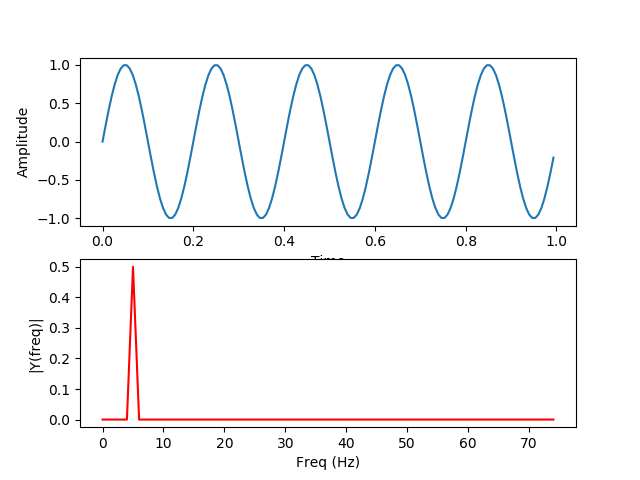

In [18]:
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(2,1,2)
plt.plot(frq, abs(Y), 'r') # plotting the spectrum
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')

# Tutorial 2

[source](https://gist.github.com/jedludlow/3919130)

$f_s$ is the sampling frequency, while $f$ is a base frequency for the signal content. We create a signal that contains components at a couple of multiples of this base frequency. Note the amplitudes here since we will be trying to extract those correctly from the FFT later.

### Create a test signal

In [19]:
f_s = 50.0 # sampling frequency (Hz)
f = 1.0 # base frequency of signal content (Hz)

In [20]:
sample_secs = 3.0 # number of seconds of the sample

In [21]:
time = np.arange(0.0, sample_secs, 1/f_s)
time

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
        0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
        0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
        0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
        0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
        0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ,  1.02,  1.04,  1.06,
        1.08,  1.1 ,  1.12,  1.14,  1.16,  1.18,  1.2 ,  1.22,  1.24,
        1.26,  1.28,  1.3 ,  1.32,  1.34,  1.36,  1.38,  1.4 ,  1.42,
        1.44,  1.46,  1.48,  1.5 ,  1.52,  1.54,  1.56,  1.58,  1.6 ,
        1.62,  1.64,  1.66,  1.68,  1.7 ,  1.72,  1.74,  1.76,  1.78,
        1.8 ,  1.82,  1.84,  1.86,  1.88,  1.9 ,  1.92,  1.94,  1.96,
        1.98,  2.  ,  2.02,  2.04,  2.06,  2.08,  2.1 ,  2.12,  2.14,
        2.16,  2.18,  2.2 ,  2.22,  2.24,  2.26,  2.28,  2.3 ,  2.32,
        2.34,  2.36,  2.38,  2.4 ,  2.42,  2.44,  2.46,  2.48,  2.5 ,
        2.52,  2.54,

In [22]:
signal1_f = 1.0
signal1_a = 5.0

In [23]:
signal2_f = 10.0
signal2_a = 2.0

In [24]:
x = signal1_a * np.sin(signal1_f * 2*np.pi * f * time) + signal2_a * np.sin(signal2_f * 2*np.pi * f * time)

<IPython.core.display.Javascript object>


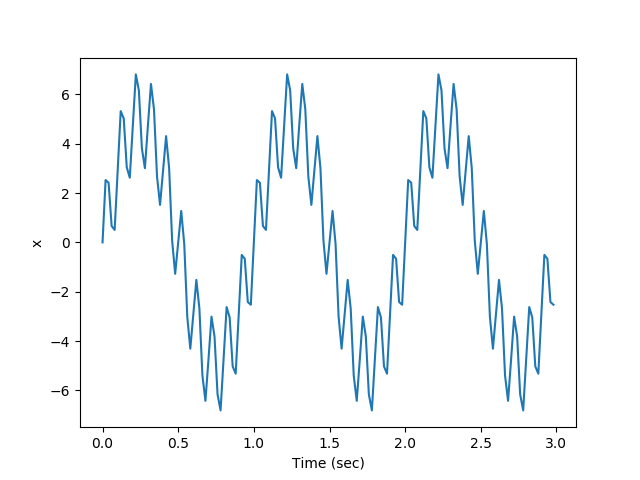

In [36]:
plt.figure()
plt.plot(time, x)
plt.xlabel("Time (sec)")
plt.ylabel("x")

### Compute FFT

The FFT and a matching vector of frequencies


In [37]:
fft_x = np.fft.fft(x)
n = len(fft_x)
print(fft_x)

[  3.34579789e-13 +0.00000000e+00j   1.83600888e-13 +4.32559024e-13j
  -1.36198764e-13 +1.89001932e-13j  -6.94616138e-13 -3.75000000e+02j
   6.39100813e-14 -4.53600706e-14j   1.47532627e-13 -5.45701013e-14j
  -4.12736780e-14 +1.85312045e-13j  -1.50747290e-13 -1.12584498e-13j
   7.78176234e-14 +5.63504136e-14j  -1.04868804e-13 -1.96442260e-13j
  -5.16011475e-14 +2.32209427e-14j   7.38601398e-15 -3.09248957e-14j
  -1.37154941e-14 -6.75087587e-14j   6.75891993e-14 -2.84398230e-14j
   7.02643254e-14 -1.76487169e-14j   6.76202792e-14 +3.48277435e-14j
  -3.82043448e-14 -3.68435776e-14j   1.60172797e-13 -1.45048959e-14j
  -3.02995682e-14 +8.11025786e-15j   1.87189380e-13 +3.96467214e-14j
  -8.57961335e-14 +1.55955695e-13j   3.35632594e-14 +2.95130570e-15j
   4.95505027e-14 -1.33048440e-14j   6.96450713e-14 +1.71544889e-13j
  -1.70073385e-13 +1.83742485e-13j  -1.68353535e-13 -8.68007403e-14j
   4.04607432e-14 -1.36039673e-13j  -1.55350276e-14 +1.98951966e-13j
  -3.27773929e-14 +9.89404487e-15j

In [38]:
freq = np.fft.fftfreq(n, 1/f_s)

In [39]:
print(freq)

[  0.           0.33333333   0.66666667   1.           1.33333333
   1.66666667   2.           2.33333333   2.66666667   3.           3.33333333
   3.66666667   4.           4.33333333   4.66666667   5.           5.33333333
   5.66666667   6.           6.33333333   6.66666667   7.           7.33333333
   7.66666667   8.           8.33333333   8.66666667   9.           9.33333333
   9.66666667  10.          10.33333333  10.66666667  11.          11.33333333
  11.66666667  12.          12.33333333  12.66666667  13.          13.33333333
  13.66666667  14.          14.33333333  14.66666667  15.          15.33333333
  15.66666667  16.          16.33333333  16.66666667  17.          17.33333333
  17.66666667  18.          18.33333333  18.66666667  19.          19.33333333
  19.66666667  20.          20.33333333  20.66666667  21.          21.33333333
  21.66666667  22.          22.33333333  22.66666667  23.          23.33333333
  23.66666667  24.          24.33333333  24.66666667 -25.        

<IPython.core.display.Javascript object>


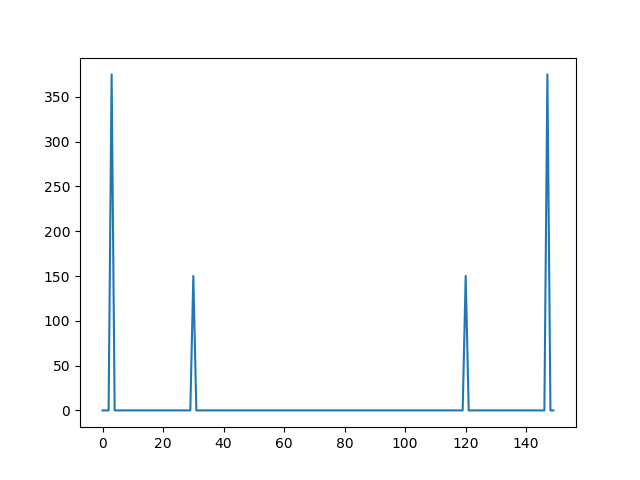

In [40]:
plt.figure()
plt.plot(np.abs(fft_x))

### Swap Half spaces

Note that frequencies in the FFT and the freq vector go from zero to some larger positive number then from a large negative number back toward zero. We can swap that so that the DC component is in the center of the vector while maintaining a two-sided spectrum.

In [41]:
fft_x_shifted = np.fft.fftshift(fft_x)
freq_shifted = np.fft.fftshift(freq)
print(fft_x_shifted)
print(freq_shifted)

[  2.61072693e-14 +1.14217370e-14j  -2.07224857e-14 -2.82404278e-14j
   9.68682966e-14 +7.08065211e-14j  -7.13914995e-15 -2.84413102e-14j
   1.69393738e-14 +6.56823866e-14j  -8.72981397e-14 +7.26503933e-14j
  -2.01884294e-14 -2.71493084e-14j   5.85627816e-14 -2.83232557e-14j
  -3.22738264e-14 +1.05207527e-13j  -1.84147707e-13 +2.94512137e-15j
  -1.28252108e-14 -1.18842354e-13j   2.35266410e-14 -4.68979925e-14j
  -1.72028370e-13 +9.23705556e-14j  -6.05931432e-14 -2.10318626e-13j
   1.14710124e-13 -2.00705609e-13j   2.23257749e-13 -4.26325641e-14j
   1.63260840e-13 -6.50568991e-15j   6.09987031e-14 +1.31562335e-13j
   6.96371609e-14 +3.73035664e-14j   1.30590834e-14 +2.14885454e-13j
   4.24847884e-14 -9.71799764e-14j   3.33755614e-14 +2.04465315e-13j
  -1.57756016e-13 +6.17452552e-14j  -2.85975844e-14 -3.49380161e-15j
   8.53670103e-14 -6.45493412e-14j  -6.67544039e-14 +1.31822038e-13j
  -7.73201670e-14 -1.31743914e-14j  -6.91628997e-14 -4.98590400e-14j
   3.90500468e-14 -2.44809253e-15j

<IPython.core.display.Javascript object>


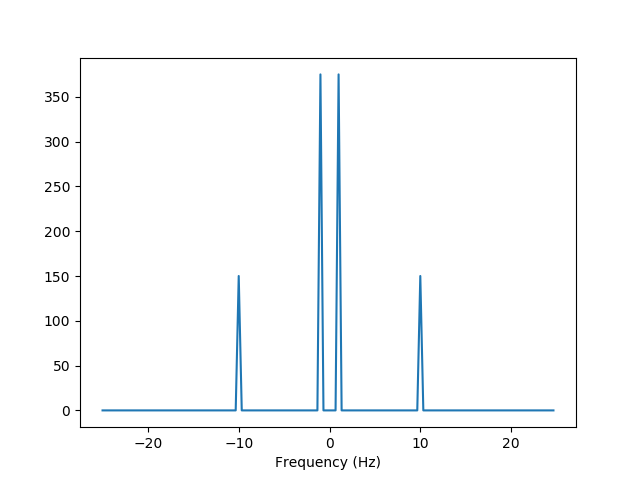

In [42]:
plt.figure()
plt.plot(freq_shifted, np.abs(fft_x_shifted))
plt.xlabel("Frequency (Hz)")

### Fold Negative Frequencies and Scale

It's actually more common to look at just the first half of the unshifted FFT and frequency vectors and fold all the amplitude information into the positive frequencies. Furthermore, to get ampltude right, we must normalize by the length of the original FFT. Note the factor of $2/n$ in the following which accomplishes both the folding and scaling.

In [43]:
half_n = int(np.ceil(n/2.0))

In [44]:
fft_x_half = (2.0 / n) * fft_x[:half_n]

In [45]:
freq_half = freq[:half_n]

<IPython.core.display.Javascript object>


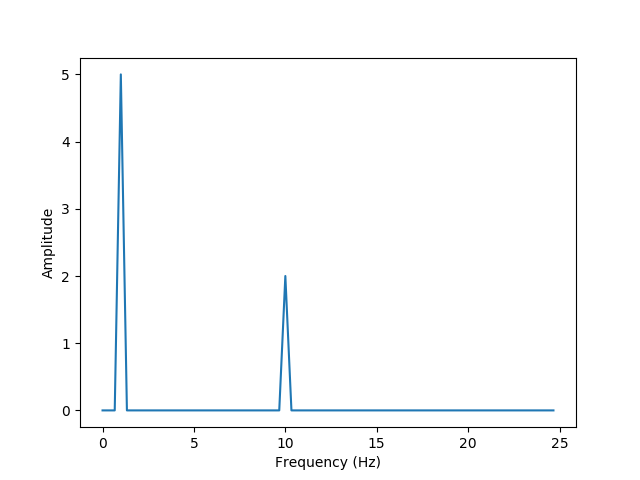

In [46]:
plt.figure()
plt.plot(freq_half, np.abs(fft_x_half))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

In [50]:
sort_idx = np.argsort(np.abs(fft_x_half))[::-1]

In [62]:
import pandas as pd

In [74]:
pd.DataFrame(np.hstack((np.abs(fft_x_half)[sort_idx].reshape((-1, 1)), freq_half[sort_idx].reshape((-1, 1)))), columns=['Frequency', 'Amplitude'])

,Frequency,Amplitude
0,5.000000e+00,1.000000
1,2.000000e+00,10.000000
2,6.265484e-15,0.333333
3,4.461064e-15,0.000000
4,3.338296e-15,8.000000
5,3.307305e-15,11.333333
6,3.106175e-15,0.666667
7,3.089002e-15,12.000000
8,3.051566e-15,20.333333
9,3.030557e-15,20.000000
